# Análise do Impacto dos Eventos Econômicos no Ibovespa

Este notebook explora a relação entre eventos econômicos importantes e as variações no fechamento do índice Ibovespa.

## Passo 1: Importar Bibliotecas Necessárias

Primeiro, vamos importar as bibliotecas que utilizaremos no processo de análise.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Passo 2: Carregar os Dados Preparados

Vamos carregar o arquivo CSV contendo os dados históricos do Ibovespa que foram preparados anteriormente.


In [42]:
# Carregar os dados preparados
df = pd.read_csv('dados_preparados.csv')
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Evento_Eleição Presidencial 2022,Evento_Impeachment de Dilma Rousseff,Evento_Nenhum,Evento_Pandemia de COVID-19,Evento_Recessão Econômica Brasileira,Evento_Recuperação Pós-Pandemia,Vol_log
0,2024-07-12,128.897,128.293,129.015,128.002,7.210000e+09,0.47,False,False,False,False,False,True,22.698735
1,2024-07-11,128.294,127.221,128.326,127.221,7.970000e+09,0.85,False,False,False,False,False,True,22.798950
2,2024-07-10,127.218,127.109,127.769,126.928,8.150000e+09,0.09,False,False,False,False,False,True,22.821284
3,2024-07-09,127.108,126.548,127.295,125.937,6.680000e+09,0.44,False,False,False,False,False,True,22.622384
4,2024-07-08,126.548,126.280,126.551,125.614,7.430000e+09,0.22,False,False,False,False,False,True,22.728792


## Passo 3: Remover Outliers

Vamos identificar e remover os outliers do fechamento usando o método do IQR (Interquartile Range).


In [43]:
# Identificar outliers usando o método do IQR (Interquartile Range)
Q1 = df['Último'].quantile(0.25)
Q3 = df['Último'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Último'] < (Q1 - 1.5 * IQR)) | (df['Último'] > (Q3 + 1.5 * IQR))]

# Remover os outliers
df_no_outliers = df[~df.index.isin(outliers.index)]
df_no_outliers.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Evento_Eleição Presidencial 2022,Evento_Impeachment de Dilma Rousseff,Evento_Nenhum,Evento_Pandemia de COVID-19,Evento_Recessão Econômica Brasileira,Evento_Recuperação Pós-Pandemia,Vol_log
0,2024-07-12,128.897,128.293,129.015,128.002,7.210000e+09,0.47,False,False,False,False,False,True,22.698735
1,2024-07-11,128.294,127.221,128.326,127.221,7.970000e+09,0.85,False,False,False,False,False,True,22.798950
2,2024-07-10,127.218,127.109,127.769,126.928,8.150000e+09,0.09,False,False,False,False,False,True,22.821284
3,2024-07-09,127.108,126.548,127.295,125.937,6.680000e+09,0.44,False,False,False,False,False,True,22.622384
4,2024-07-08,126.548,126.280,126.551,125.614,7.430000e+09,0.22,False,False,False,False,False,True,22.728792


## Passo 4: Analisar o Impacto dos Eventos Econômicos

### 4.1: Visualização do Fechamento ao Longo do Tempo

Vamos explorar a relação entre os eventos econômicos e o fechamento do índice Ibovespa. Primeiramente, vamos visualizar a distribuição dos dados ao longo do tempo.

Este gráfico mostra a evolução do fechamento diário do Ibovespa ao longo do tempo. Podemos observar tendências gerais e identificar períodos de maior volatilidade.


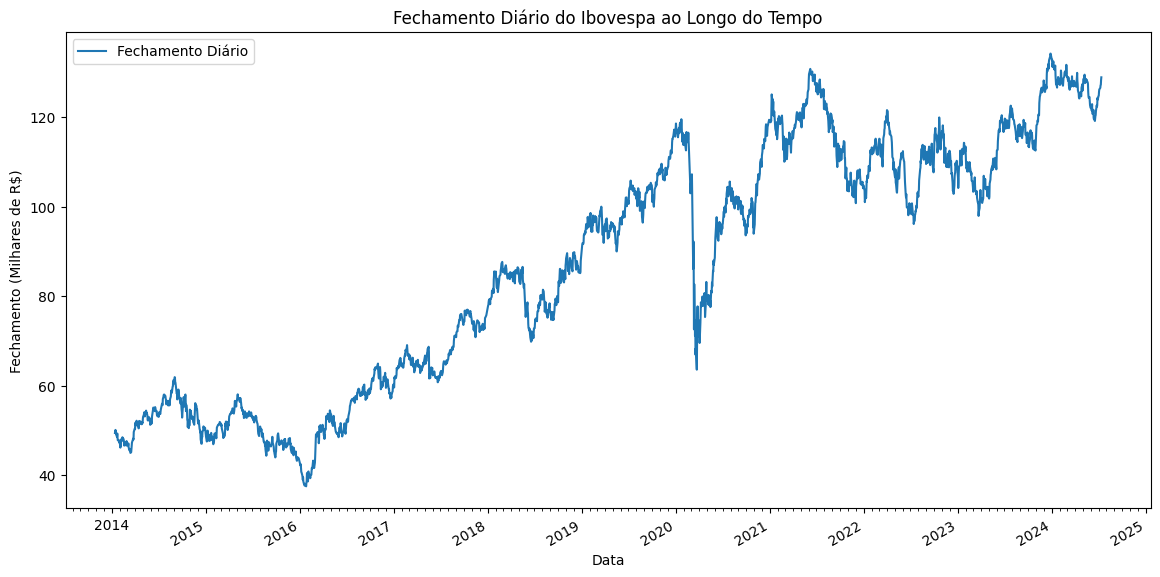

In [44]:
# Visualizar o fechamento do Ibovespa ao longo do tempo
plt.figure(figsize=(14, 7))

# Formatar o eixo x para melhorar a legibilidade das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.plot(df_no_outliers['Data'], df_no_outliers['Último'], label='Fechamento Diário')
plt.xlabel('Data')
plt.ylabel('Fechamento (Milhares de R$)')
plt.title('Fechamento Diário do Ibovespa ao Longo do Tempo')
plt.legend()
plt.show()

### 4.2: Impacto de Eventos Específicos

Vamos explorar como eventos econômicos específicos impactaram o fechamento do índice Ibovespa. Iremos comparar o fechamento médio do índice durante diferentes períodos de eventos.

Este gráfico de boxplot compara a distribuição do fechamento do Ibovespa durante períodos de eventos econômicos específicos. Isso nos ajuda a entender como cada evento pode ter influenciado o mercado.


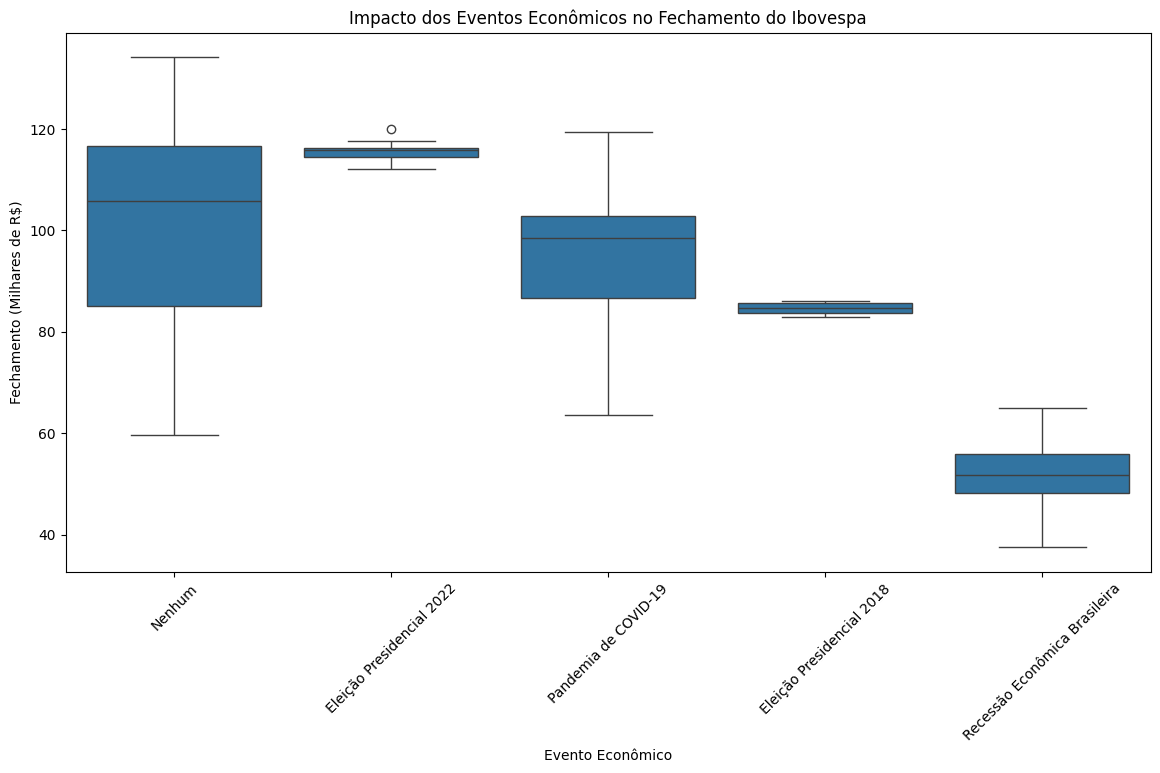

In [45]:
# Definir os eventos econômicos
eventos = {
    'Recessão Econômica Brasileira': ('2014-01-01', '2016-12-31'),
    'Impeachment de Dilma Rousseff': ('2016-04-17', '2016-04-17'),
    'Eleição Presidencial 2018': ('2018-10-07', '2018-10-28'),
    'Pandemia de COVID-19': ('2020-02-26', '2020-12-31'),
    'Eleição Presidencial 2022': ('2022-10-02', '2022-10-30')
}

# Adicionar uma coluna de evento ao dataframe
df_no_outliers['Evento'] = 'Nenhum'

for evento, (inicio, fim) in eventos.items():
    mask = (df['Data'] >= inicio) & (df_no_outliers['Data'] <= fim)
    df_no_outliers.loc[mask, 'Evento'] = evento

# Visualizar o impacto dos eventos no fechamento do índice
plt.figure(figsize=(14, 7))
sns.boxplot(x='Evento', y='Último', data=df_no_outliers)
plt.xlabel('Evento Econômico')
plt.ylabel('Fechamento (Milhares de R$)')
plt.title('Impacto dos Eventos Econômicos no Fechamento do Ibovespa')
plt.xticks(rotation=45)
plt.show()

### 4.3: Estatísticas Descritivas por Evento

Vamos calcular estatísticas descritivas do fechamento do índice durante cada evento econômico para melhor compreender seu impacto.

Esta tabela apresenta estatísticas descritivas para o fechamento do Ibovespa em diferentes períodos de eventos econômicos, incluindo média, desvio padrão, valores mínimos e máximos, e quartis. Estas estatísticas nos ajudam a entender melhor a variação e a distribuição do fechamento durante cada evento.


In [46]:
# Calcular estatísticas descritivas por evento
estatisticas_eventos = df_no_outliers.groupby('Evento')['Último'].describe()
estatisticas_eventos

,count,mean,std,min,25%,50%,75%,max
Evento,,,,,,,,
Eleição Presidencial 2018,14.0,84.674714,1.183974,82.921,83.7210,84.760,85.71950,86.088
Eleição Presidencial 2022,19.0,115.576947,1.815327,112.072,114.5825,115.941,116.32450,119.929
Nenhum,1622.0,101.239014,19.749908,59.589,85.1545,105.878,116.67625,134.194
Pandemia de COVID-19,212.0,95.664604,12.421391,63.570,86.7285,98.433,102.80900,119.409
Recessão Econômica Brasileira,735.0,51.961299,5.357914,37.497,48.1650,51.833,55.86600,64.925
